In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

* Load Datasets 
* Check for Seasonality Factors (e.g.,rainfall, temperature, etc).
* Visualize Trends Over Time:
* Use line plots to show malaria prevalence.

Regression Modeling:
* Predict malaria prevalence using seasonal factors like temperature, rainfall etc.
* Use statsmodel to check for statistics

In [2]:
mal = pd.read_csv('Malaria screener.csv')

In [3]:
mal.columns.tolist()

['DHSID',
 'GPS_Dataset',
 'DHSCC',
 'DHSYEAR',
 'DHSCLUST',
 'SurveyID',
 'All_Population_Count_2000',
 'All_Population_Count_2005',
 'All_Population_Count_2010',
 'All_Population_Count_2015',
 'All_Population_Count_2020',
 'Aridity_2000',
 'Aridity_2005',
 'Aridity_2010',
 'Aridity_2015',
 'Aridity_2020',
 'Day_Land_Surface_Temp_2000',
 'Day_Land_Surface_Temp_2005',
 'Day_Land_Surface_Temp_2010',
 'Day_Land_Surface_Temp_2015',
 'Day_Land_Surface_Temp_2020',
 'Diurnal_Temperature_Range_2000',
 'Diurnal_Temperature_Range_2005',
 'Diurnal_Temperature_Range_2010',
 'Diurnal_Temperature_Range_2015',
 'Diurnal_Temperature_Range_2020',
 'Drought_Episodes',
 'Elevation',
 'Enhanced_Vegetation_Index_2000',
 'Enhanced_Vegetation_Index_2005',
 'Enhanced_Vegetation_Index_2010',
 'Enhanced_Vegetation_Index_2015',
 'Enhanced_Vegetation_Index_2020',
 'Frost_Days_2000',
 'Frost_Days_2005',
 'Frost_Days_2010',
 'Frost_Days_2015',
 'Frost_Days_2020',
 'Global_Human_Footprint',
 'Growing_Season_Length'

In [4]:
selected_features = [
    'Malaria_Prevalence_2020',  # Target variable
    'Drought_Episodes',   
    'Mean_Temperature_2020',  
    'Precipitation_2020',  
    'Rainfall_2020',  
    'Wet_Days_2000',
    'Temperature_January',
    'Growing_Season_Length',
    'Day_Land_Surface_Temp_2005',
    'Diurnal_Temperature_Range_2020',
]

In [5]:
# Subset the data
analysis_mal = mal[selected_features]

In [6]:
# Check for missing values in the selected columns
missing_values = analysis_mal.isnull().sum()

# Drop rows with missing values for simplicity
analysis_mal_clean = analysis_mal.dropna()

# Display summary of the cleaned dataset
analysis_mal_clean.describe(), missing_values

(       Malaria_Prevalence_2020  Drought_Episodes  Mean_Temperature_2020  \
 count               510.000000        510.000000             510.000000   
 mean                  0.261981          4.490196              27.344037   
 std                   0.128174          2.207084               0.865663   
 min                   0.052831          1.000000              23.530830   
 25%                   0.168825          4.000000              27.053458   
 50%                   0.245822          4.000000              27.328849   
 75%                   0.330523          7.000000              27.748536   
 max                   0.691903          9.000000              29.448206   
 
        Precipitation_2020  Rainfall_2020  Wet_Days_2000  Temperature_January  \
 count          510.000000     510.000000     510.000000           510.000000   
 mean           114.978394    1355.802113       7.551795            24.966334   
 std             41.658464     550.470917       2.580214             1.

In [7]:
# Remove Outliers
# Define a function to remove outliers based on the IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the selected columns
analysis_mal_clean = remove_outliers(analysis_mal_clean, selected_features)

In [9]:
X = analysis_mal_clean[['Drought_Episodes', 'Mean_Temperature_2020', 'Precipitation_2020', 'Rainfall_2020', 'Wet_Days_2000','Wet_Days_2000', 'Temperature_January','Growing_Season_Length','Day_Land_Surface_Temp_2005','Diurnal_Temperature_Range_2020']]
y = analysis_mal_clean['Malaria_Prevalence_2020']

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a constant for the intercept in regression
X = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Display regression results
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Malaria_Prevalence_2020   R-squared:                       0.554
Model:                                 OLS   Adj. R-squared:                  0.544
Method:                      Least Squares   F-statistic:                     54.21
Date:                     Sun, 09 Mar 2025   Prob (F-statistic):           1.61e-63
Time:                             15:04:08   Log-Likelihood:                 455.78
No. Observations:                      403   AIC:                            -891.6
Df Residuals:                          393   BIC:                            -851.6
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a simple linear regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regression.predict(X_test)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(322, 11)
(81, 11)
(322,)
(81,)


In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.006375143871357878
R-squared: 0.463356294639677


In [14]:
# Fit a RFR model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate performance
print(f"R-squared: {r2_score(y_test, y_pred)}")
print(f"mse: {mean_squared_error(y_test, y_pred)}")

R-squared: 0.6975883983665172
mse: 0.0035925465062275185


In [15]:
# Fit a ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

print(f"R-squared: {r2_score(y_test, y_pred)}")
print(f"mse: {mean_squared_error(y_test, y_pred)}")

R-squared: 0.46682272900665434
mse: 0.006333963815411332


In [16]:
# Cross validation scores
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Mean R-squared across folds: {cv_scores.mean()}")

Mean R-squared across folds: 0.16433387722434672


In [17]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [18]:
estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('ridge', Ridge(alpha=1.0))
]
stack_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stack_model.fit(X_train, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('ridge', Ridge())],
                  final_estimator=LinearRegression())

In [19]:
# Stacked Model
stacked_model = StackingRegressor(
    estimators=[
        ('linear_regression', LinearRegression()),
        ('ridge', Ridge(alpha=1.0)),
        ('rf', RandomForestRegressor(random_state=42))
    ],
    final_estimator=LinearRegression()
)
stacked_model.fit(X_train, y_train)

StackingRegressor(estimators=[('linear_regression', LinearRegression()),
                              ('ridge', Ridge()),
                              ('rf', RandomForestRegressor(random_state=42))],
                  final_estimator=LinearRegression())

In [20]:
 #Predictions
y_pred_linear_regression = linear_regression.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_stacked = stacked_model.predict(X_test)

In [21]:
#Evaluate Models
models = {
    'Linear Regression': y_pred_linear_regression,
    'Ridge Regression': y_pred_ridge,
    'Random Forest': y_pred_rf,
    'Stacked Model': y_pred_stacked
}

In [22]:
# Calculate R-squared for each model
for model_name, y_pred in models.items():
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} R-squared: {r2:.4f}")

Linear Regression R-squared: 0.4634
Ridge Regression R-squared: 0.4668
Random Forest R-squared: 0.6976
Stacked Model R-squared: 0.6958


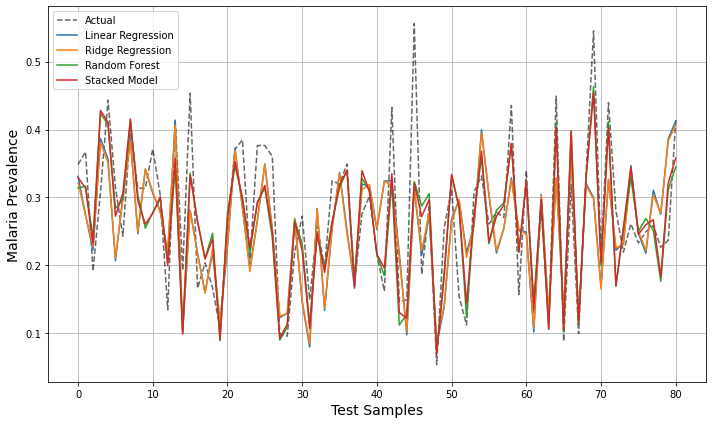

In [23]:
#Plot the Models
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', alpha=0.6, linestyle='dashed')

for model_name, y_pred in models.items():
    plt.plot(y_pred, label=model_name)

#plt.title("Model Predictions vs. Actual Values")
plt.xlabel("Test Samples", fontsize=14)
plt.ylabel("Malaria Prevalence", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

    Model Predictions vs. Actual Values

Text(0.5, 0, 'Errors')

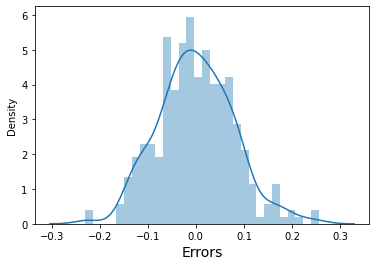

In [25]:
y_train_pi = linear_regression.predict(X_train)

#plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pi), bins =30)
#fig.suptitle('Error Terms', fontsize=12)
plt.xlabel('Errors', fontsize=14)

In [26]:
y_pred_train =linear_regression.predict(X_train)
print('Coefficients:', linear_regression.coef_)
print('Intercept:', linear_regression.intercept_)
print("Trainingscore : " , linear_regression.score(X_train, y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Coefficients: [ 0.          0.00683504 -0.00112294 -0.09200451  0.01033235  0.07796502
  0.07796502  0.06617054  0.0326058  -0.07213901  0.17863127]
Intercept: 0.2449861855076581
Trainingscore :  0.563978756204168
Mean Absolute Error: 0.06175825930374498
Mean Squared Error: 0.006086417755827865
Root Mean Squared Error: 0.07801549689534679


In [27]:
def adjusted_r2(r_square, labels, features):
    
    adj_r_square = 1 - ((1 - r_square) * (len(labels) - 1)) / (len(labels) - features.shape[1] - 1)
    
    return adj_r_square

In [28]:
y_pred_test =linear_regression.predict(X_test)
print('Coefficients:', linear_regression.coef_)
print('Intercept:', linear_regression.intercept_)
print("Testingscore : ", r2_score(y_test, y_pred_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Coefficients: [ 0.          0.00683504 -0.00112294 -0.09200451  0.01033235  0.07796502
  0.07796502  0.06617054  0.0326058  -0.07213901  0.17863127]
Intercept: 0.2449861855076581
Testingscore :  0.463356294639677
Mean Absolute Error: 0.062411624424265066
Mean Squared Error: 0.006375143871357878
Root Mean Squared Error: 0.07984449806566435


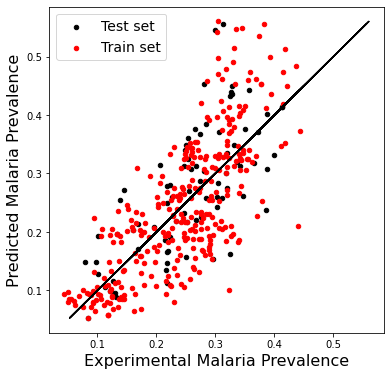

In [29]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(linear_regression.predict(X_test), y_test, s=20, color='black', label = 'Test set')
ax.scatter(linear_regression.predict(X_train), y_train, s=20, color='red', label = 'Train set')
ax.plot(y_test, y_test, color='black')
ax.plot(y_train, y_train, color='black')
plt.legend(fontsize=14)
ax.set_xlabel('Experimental Malaria Prevalence', fontsize=16)
ax.set_ylabel('Predicted Malaria Prevalence', fontsize=16);

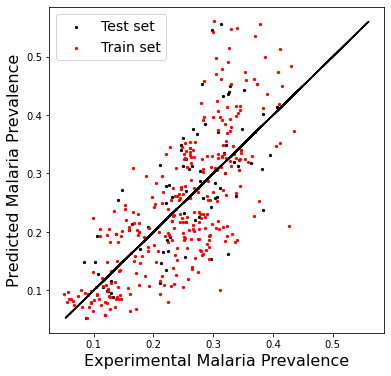

In [30]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(ridge_model.predict(X_test), y_test, s=5, color='black', label = 'Test set')
ax.scatter(ridge_model.predict(X_train), y_train, s=5, color='red', label = 'Train set')
ax.plot(y_test, y_test, color='black')
ax.plot(y_train, y_train, color='black')
plt.legend(fontsize=14)
ax.set_xlabel('Experimental Malaria Prevalence', fontsize=16)
ax.set_ylabel('Predicted Malaria Prevalence', fontsize=16);

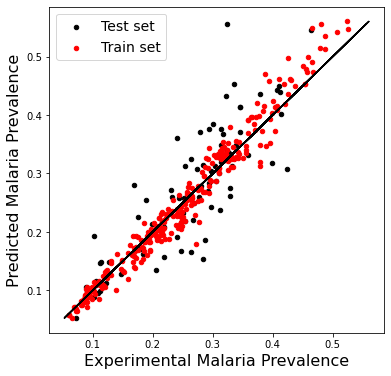

In [31]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(rf_model.predict(X_test), y_test, s=20, color='black', label = 'Test set')
ax.scatter(rf_model.predict(X_train), y_train, s=20, color='red', label = 'Train set')
ax.plot(y_test, y_test, color='black')
ax.plot(y_train, y_train, color='black')
plt.legend(fontsize=14)
ax.set_xlabel('Experimental Malaria Prevalence', fontsize=16)
ax.set_ylabel('Predicted Malaria Prevalence', fontsize=16);